# <span style=color:blue><b>SPRINT 5 - Tarea M5 T02</b></span>  

**Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.**  
**Concerns housing values in suburbs of Boston.**

## Ejercicio 1
<span style=color:green><b><i>Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo. También adjunto encontrarás una descripción de las diferentes variables del dataset.</i></b></span>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open the choosen file
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 5. Introducción al Test de Hipótesis y al Machine Learning"

df = pd.read_csv(Archivo + '/Tarea 2_ViviendasHouston/housing data.csv', 
                header = None, 
                 names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                          "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Figure size 1440x720 with 0 Axes>

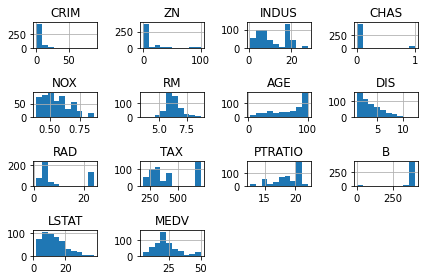

In [5]:
plt.figure(figsize = (20,10))
df.hist()
plt.tight_layout() # para que no se superpongan las graficas

In [6]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Procedimiento planteado:  
 - Evaluation: 80% Train y 20% Test.
 - Random rows 
 - Model: Regression (used to: Predict quantity)
 - Target/ output/ y: MEDV (Median value of owner-occupied homes in $1000's)

In [7]:
# train-test split evaluation 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# load dataset
data = df.values

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print("Shape:", X.shape, y.shape)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Train and Test Sets Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

# make predictions
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Shape: (506, 13) (506,)
Train and Test Sets Shapes: (404, 13) (102, 13) (404,) (102,)
MAE: 2.351


**R:** El error promedio (MAE) entre las predicciones y los datos reales en este conjunto de datos es de 2.351, lo que se considera un buen valor.

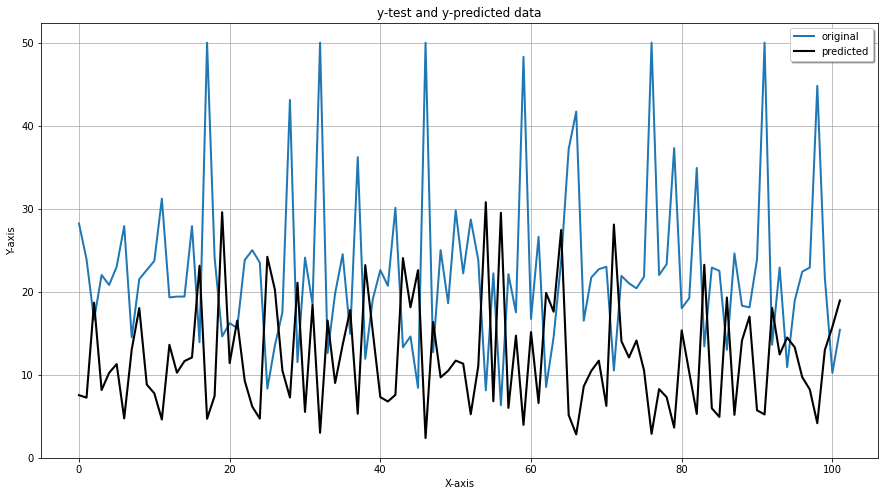

In [47]:
plt.figure(figsize = (15,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original")
plt.plot(x_ax, yhat, linewidth=2.1, label="predicted", c="black")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Ejercicio 2
<span style=color:green><b><i>Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).</i></b></span>

https://scikit-learn.org/stable/modules/preprocessing.html  
https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

**ESTANDARIZACIÓN:**

In [20]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

#En el ejercicio 1, ya se definió el dataset numérico "data" y se definió los inputs "X":

Xscaled = scale.fit_transform(X)

print(Xscaled)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [21]:
# train-test split evaluation 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# repeat the train test TEST with X standarized (inputs) and "y" (output), already defined in previous steps:
print("Shape:", Xscaled.shape, y.shape)

# split into train test sets
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.20, random_state=1)
print("Train and Test Sets Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(Xscaled_train, y_train)

# make predictions
yhat_scaled = model.predict(Xscaled_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat_scaled)
print('MAE: %.3f' % mae)

Shape: (506, 13) (506,)
Train and Test Sets Shapes: (404, 560) (102, 560) (404,) (102,)
MAE: 2.351


**R:** El error promedio (MAE) de los datos estandarizados es igual que el original: 2.351.

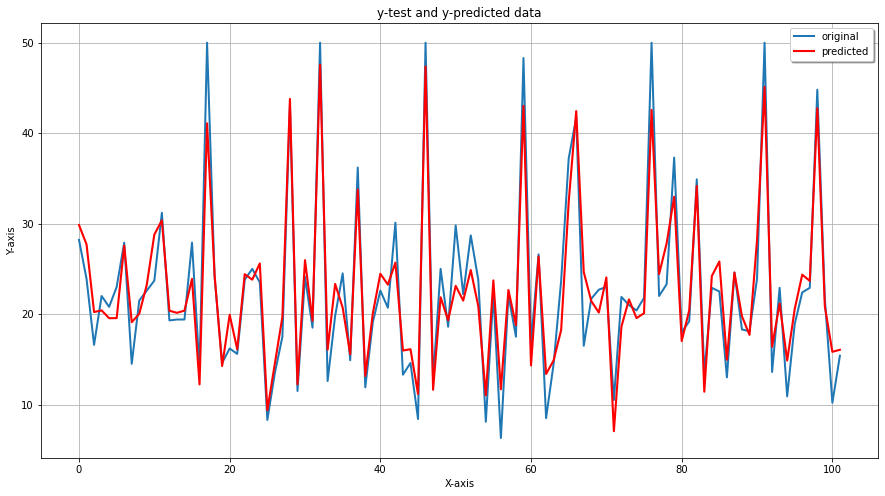

In [44]:
plt.figure(figsize = (15,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original")
plt.plot(x_ax, yhat_scaled, linewidth=2.1, label="predicted", c="r")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**DUMMIES:**

Como se observó en la información del dataframe, todos los valores son numéricos, NO EXISTEN valores categóricos que requieran convertise en dummies.  
  
*OBERVASIÓN: La columna "CHAS", ya está establecida como una variable dummy, donde (= 1 if tract bounds river; 0 otherwise).*

**POLYNOMIAL FEATURE:**

 - Podemos aplicar DIRECTAMENTE la transformación polinómica al conjunto de datos.
 - En este caso, usaremos un grado de 3. (Se recomienda 2 o 3)

In [52]:
# visualize a polynomial features transform
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures

# retrieve just the numeric INPUT values (X)
data = df.values[:, :-1]

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
X_Polynomial = trans.fit_transform(data)

# summarize
print(X_Polynomial.shape)

(506, 560)


 - Podemos observar como las columnas aumentaron de 13 a 560 (INPUTS)
 - Ahora evaluaremos nuevamente Train - Test (Model: Regression) y compararemos resultados.

In [53]:
# split into inputs and outputs
print("Shape:", X_Polynomial.shape, y.shape)

# split into train test sets
X_Poly_train, X_Poly_test, y_train, y_test = train_test_split(X_Polynomial, y, test_size=0.20, random_state=1)
print("Train and Test Sets Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_Poly_train, y_train)

# make predictions
yhat_Poly = model.predict(X_Poly_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat_Poly)
print('MAE: %.3f' % mae)

Shape: (506, 560) (506,)
Train and Test Sets Shapes: (404, 560) (102, 560) (404,) (102,)
MAE: 2.253


 - Al ejecutar el paso anterior, podemos ver que las características polinómicas transforman los resultados en una **disminución del Error Absoluto Medio de 2,351 (sin la transformación) a 2.253 con la transformación polinómica.** 

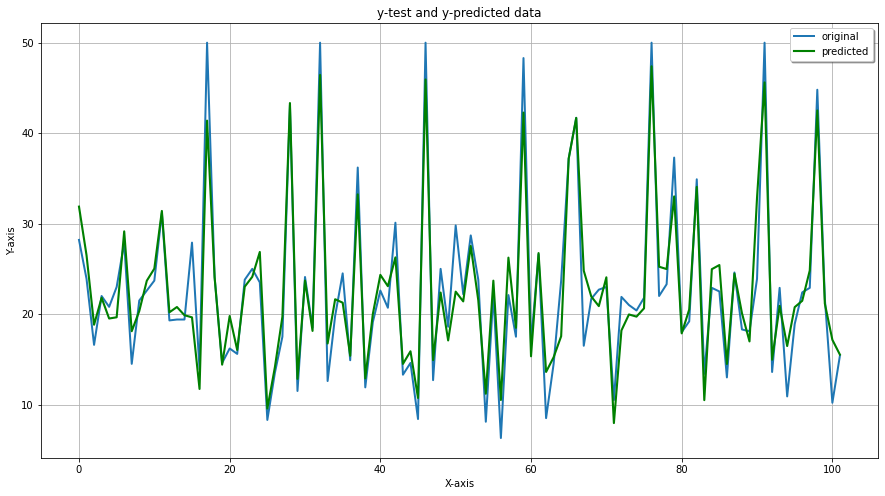

In [45]:
plt.figure(figsize = (15,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original")
plt.plot(x_ax, yhat_Poly, linewidth=2.1, label="predicted", c="g")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Ejercicio 3
<span style=color:green><b><i>Resume las nuevas columnas generadas de forma estadística y gráfica</i></b></span>

**Efecto del grado del polinomio**  
 - El grado del polinomio incrementa el número de inputs.  


Degree: 1, Features: 14
Degree: 2, Features: 105
Degree: 3, Features: 560
Degree: 4, Features: 2380
Degree: 5, Features: 8568


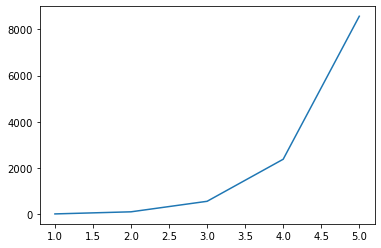

In [15]:
# compare the effect of the degree on the number of created features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

# define dataset
data = df.values
X, y = data[:, :-1], data[:, -1]

# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # record number of features
    num_features.append(data.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

A partir de un grado = 3, se observa un considerable incremento de input features.

 - Se realiza un análisis del grado seleccionado en la función: **"Polynomial Features"**

Degree: 1  -  MAE: 2.336
Degree: 2  -  MAE: 2.137
Degree: 3  -  MAE: 2.253
Degree: 4  -  MAE: 2.208


Text(0.5, 1.0, 'Effect of Polynomial Degree')

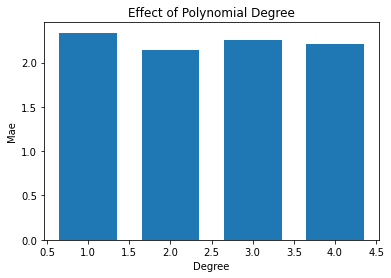

In [98]:
# retrieve just the numeric INPUT values (X)
data = df.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

degree, results = list(), list()

for d in range(1,5):

    # perform a polynomial features transform of the dataset
    trans = PolynomialFeatures(degree=d)
    X_Polynomial = trans.fit_transform(X)

    # split into train test sets
    X_Poly_train, X_Poly_test, y_train, y_test = train_test_split(X_Polynomial, y, test_size=0.20, random_state=1)

    # fit the model
    model = RandomForestRegressor(random_state=1)
    model.fit(X_Poly_train, y_train)

    # make predictions
    yhat_Poly = model.predict(X_Poly_test)

    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat_Poly)
    
    results.append(mae)
    degree.append(d)
    
    print("Degree:", d," - ", 'MAE: %.3f' % mae)

# plot model performance for comparison
plt.bar(degree, results, width = .7)
plt.xlabel("Degree")
plt.ylabel("Mae")
plt.title("Effect of Polynomial Degree")

**R:** A partir del grado 3 se incrementa el error. Se recomienda usar grado 2